In [49]:
import re
from string import punctuation
import nltk
from nltk.book import *
from nltk.corpus import stopwords # Import the stop word list


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Import a text file

In [35]:
f = open('policy_address_2017_eng.txt')
content = f.read()

## Print first 10 lines to check
print (content[:500])

The Chief Executive’s 2017 Policy Address
We Connect for
Hope and Happiness
I. Introduction: A New Beginning 1–6
II. Good Governance 7–34
My Belief 7
Executive Authorities 8–18
New Roles for the Government 8–9
Upholding the Principle of Meritocracy 10–11
Open and Transparent Government 12
Boosting Implementation Capabilities 13–15
Augmenting the civil service establishment 13
Extending the service of civil servants 14
Establishing a new civil service college 15
Stepping up Collaboration Across B


In [9]:
def text_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
        #skip this as the text is not from html
        #review_text = BeautifulSoup(raw_review).get_text() 
    review_text = raw_review
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))  

In [13]:
print ('Remove Puntuation')
print (punctuation)
print ('Remove Stopwords')
print (stopwords.words("english") )

Remove Puntuation
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
Remove Stopwords
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 

'chief executive policy address connect hope happiness introduction new beginning ii good governance belief executive authorities new roles government upholding principle meritocracy open transparent government boosting implementation capabilities augmenting civil service establishment extending service civil servants establishing new civil service college stepping collaboration across bureaux departments revamping central policy unit transferring efficiency unit innovation technology bureau legal aid department come chief secretary administration office judiciary law reform commission archives law legislating article basic law article basic law selection chief executive universal suffrage executive legislature relationship district administration integrity public finance chief executive mission leadership chief executive council advisers innovation strategic development steering committee innovation technology chief executive summits contents paragraph paragraph iii diversified econom

In [46]:
fdist1 = nltk.FreqDist(content)
print (fdist1)

TypeError: unhashable type: 'slice'

In [48]:
content.nltk.similar("good")

AttributeError: 'str' object has no attribute 'nltk'

###  Clean Text

In [32]:
#text_to_words (content)

# 5. Remove other unnessary words
unwant_words = ['hong','kong','government', 'new', 'will', 'service','also','service']
words = content.lower().split()
words2 = [w for w in words if not w in unwant_words] 
content2 = " ".join( words2 )

In [33]:
print (content2[:1000])

the chief executive’s 2017 policy address we connect for hope and happiness i. introduction: a beginning 1–6 ii. good governance 7–34 my belief 7 executive authorities 8–18 roles for the 8–9 upholding the principle of meritocracy 10–11 open and transparent 12 boosting implementation capabilities 13–15 augmenting the civil establishment 13 extending the of civil servants 14 establishing a civil college 15 stepping up collaboration across bureaux and departments 16–18 revamping the central policy unit 16 transferring the efficiency unit to the innovation and technology bureau 17 legal aid department to come under the chief secretary for administration’s office 18 judiciary 19–20 law reform commission 21 archives law 22 legislating for article 23 of the basic law 23 article 45 of the basic law: selection of the chief executive by universal suffrage 24 executive-legislature relationship 25–26 district administration 27–28 integrity 29 public finance 30 the chief executive’s mission and lea

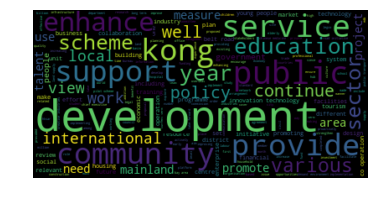

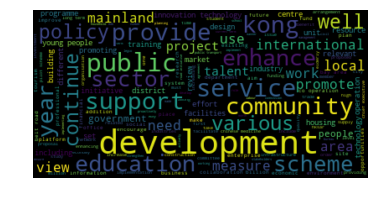

In [34]:
from wordcloud import WordCloud

#simple version
# Generate a word cloud image
wordcloud = WordCloud().generate(content2)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(content2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [38]:
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print ("Training model...")
model = word2vec.Word2Vec(content, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

2017-10-14 23:16:00,000 : INFO : 'pattern' package not found; tag filters are not available for English
2017-10-14 23:16:00,009 : INFO : collecting all words and their counts
2017-10-14 23:16:00,011 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2017-10-14 23:16:00,016 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-10-14 23:16:00,023 : INFO : PROGRESS: at sentence #10000, processed 10000 words, keeping 76 word types
2017-10-14 23:16:00,028 : INFO : PROGRESS: at sentence #20000, processed 20000 words, keeping 79 word types
2017-10-14 23:16:00,033 : INFO : PROGRESS: at sentence #30000, processed 30000 words, keeping 80 word types
2017-10-14 23:16:00,037 : INFO : PROGRESS: at sentence #40000, processed 40000 words, keeping 80 word types
2017-10-14 23:16:00,042 : INFO : PROGRESS: at sentence #50000, processed 50000 words, keeping 80 word types
2017-10-14 23:16:00,046 : I

Training model...


2017-10-14 23:16:01,219 : INFO : PROGRESS: at 54.31% examples, 133640 words/s, in_qsize 8, out_qsize 0
2017-10-14 23:16:01,919 : INFO : worker thread finished; awaiting finish of 3 more threads
2017-10-14 23:16:01,922 : INFO : worker thread finished; awaiting finish of 2 more threads
2017-10-14 23:16:01,924 : INFO : worker thread finished; awaiting finish of 1 more threads
2017-10-14 23:16:01,925 : INFO : worker thread finished; awaiting finish of 0 more threads
2017-10-14 23:16:01,928 : INFO : training on 1123200 raw words (246575 effective words) took 1.7s, 143985 effective words/s


In [40]:
model.most_similar("government")

KeyError: "word 'government' not in vocabulary"